## optional-用测试数据测试不同流程的分类效果

In [1]:
from sklearn.model_selection import train_test_split
from learn_utils import generate_test_data,linear_test,cnn_test
import matplotlib.pyplot as plt
import pandas as pd

### optional-1 生成随机分类数据，大概展示一下数据

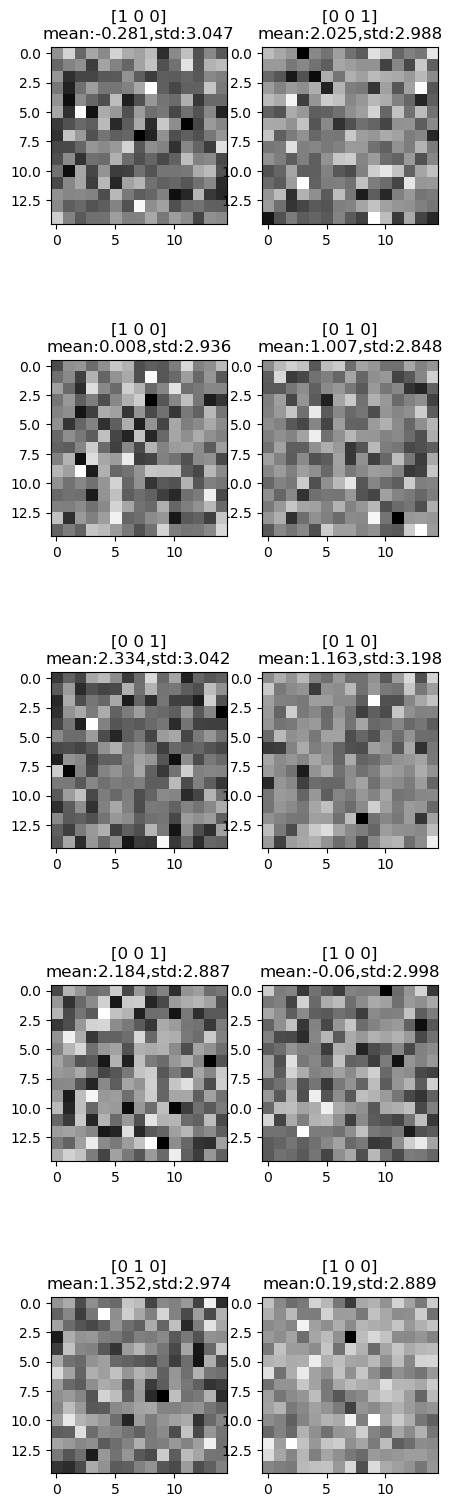

In [2]:
n=15
std=3
x_dat,y_dat= generate_test_data(n,3)
plt.figure(1,figsize=(5,20), dpi=100)
for i in range(10):
    ax = plt.subplot2grid((5, 2), (i%5,i%2 ), colspan = 1, rowspan = 1)
    ax.set_title('{}\nmean:{},std:{}'.format(y_dat[i],round(x_dat[i].mean(),3),round(x_dat[i].std(),3)))
    ax.imshow(x_dat[i],cmap=plt.cm.gray_r)

>上图的分类其实很简单，所有点的值的均值就能将图的类别分开

>可以看出不同图的均值分别是0,1,2.

>分别测试线性还有CNN，看是否能正确区分

### optional-2 线性模型，定义+运行（具体方法linear_test见learn_test.py）

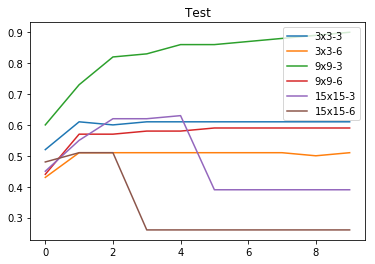

In [3]:
data = []
columns = []
for i in range(3,20,6):
    for j in range(3,7,3):
        data.append(linear_test(i,j))
        columns.append('{0}x{0}-{1}'.format(i,j))
data=pd.DataFrame(data).T
data.columns=columns
data.plot(title='Test')
plt.legend()
plt.show()

**说明：可以看出模拟的数据，在std小的时候表现要比std大的时候好，且参数的数目也有很大关系，可以防止过拟合**
**这一共是1000张图训练出来的效果，对于15x15这样的参数数目，1000个样本已经无法很好的训练出模型了**

### optional-3 CNN模型，定义+运行（具体方法cnn_test见learn_test.py）

In [4]:
data = []
columns = []
for i in range(10,100,10):
    for j in range(3,7,3):
        data.append(cnn_test(i,j))
        columns.append('{0}x{0}-{1}'.format(i,j))
data=pd.DataFrame(data).T
data.columns=columns
data.plot(title='Test')
plt.legend()
plt.show()

ValueError: Dimensions must be equal, but are 10 and 32 for 'Mul' (op: 'Mul') with input shapes: [?,10,10], [3,3,1,32].